In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
Glass=pd.read_csv("glass.csv")
Glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
X = Glass.iloc[:, 0:9]
Y = Glass.iloc[:, 9]

In [4]:
#KNN

In [5]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [6]:
model.predict([[3,100,80,35,120,28.9,0.4,28,69],[4,50,67,22,400,15,0.2,50,75]])

array([1, 2], dtype=int64)

In [7]:
# Using k fold cross validation

In [8]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)
print(results,'\n')
print(results.mean())

[0.5        0.81818182 0.72727273 0.90909091 0.19047619 0.52380952
 0.42857143 0.         0.14285714 0.04761905] 

0.42878787878787883


In [9]:
#Grid Search for Algorithm Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
n_neighbors = np.array(range(10,20))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid

{'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}

In [12]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [13]:
print(grid.best_score_,'\n')
print(grid.best_params_)
grid.

0.626467331118494 

{'n_neighbors': 17}


# Visualizing the CV Results

In [14]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(10,20)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

9    0.637013
8    0.632468
7    0.618398
6    0.618182
0    0.613636
4    0.613636
3    0.609091
2    0.608874
5    0.604113
1    0.589827
dtype: float64

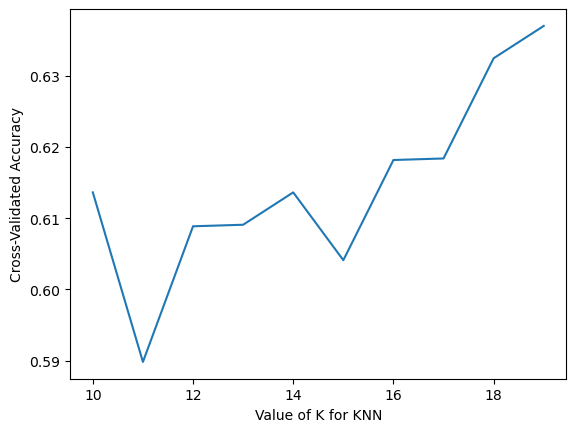

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(10,20)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Conclusion

In [ ]:
The average score of the best estimator across all cross-validation folds. is 62.64%